In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt
%matplotlib inline 

from sklearn import datasets
from sklearn import linear_model
from sklearn.metrics import r2_score
from sklearn.cross_validation import train_test_split
from sklearn.cross_validation import cross_val_score
from sklearn.cross_validation import cross_val_predict

/Applications/anaconda/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [7]:
dfs = pd.read_csv('datasets/ranking-submission.csv')
dfc = pd.read_csv('datasets/challenge-dataset.csv')

In [8]:
dfc.loc[dfc['income'] == '-', 'income'] = 41.0 #MEDIAN of NON-DASHES
dfc['income'] = dfc['income'].astype(float)    
dfc['international_students'] = dfc['international_students'].str.replace('%', '')
dfc.loc[dfc['international_students'].isnull(), 'international_students'] = 13
dfc['international_students'] = dfc['international_students'].astype(float)
dfc.loc[dfc['international'] == '-', 'international'] = 50.3 #MEDIAN of NON-DASHES
dfc['international'] = dfc['international'].astype(float) 
dfc['world_rank'] = pd.to_numeric(dfc['world_rank'], errors='coerce')
dfc['world_rank'].fillna(value=100, inplace=True) # *100* = MEDIAN of NON-DASHES
dfc['world_rank'] = dfc['world_rank'].astype(int)
dfc['num_students'] = dfc['num_students'].str.replace(',', '')
dfc['num_students'] = dfc.loc[:, ['num_students']].astype(float)
dfc['num_students'] = dfc.loc[:, ['num_students']].astype(float)
dfc.loc[dfc['num_students'].isnull(), 'num_students'] = 20851.0 #MEDIAN of NON-NULLS
dfc.loc[dfc['student_staff_ratio'].isnull(), 'student_staff_ratio'] = 16.1 #MEDIAN of NON-NULLS

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1001 entries, 0 to 1602
Data columns (total 9 columns):
international             1001 non-null float64
num_students              1001 non-null float64
income                    1001 non-null float64
teaching                  1001 non-null float64
research                  1001 non-null float64
citations                 1001 non-null float64
international_students    1001 non-null float64
total_score               1001 non-null object
year                      1001 non-null int64
dtypes: float64(7), int64(1), object(1)
memory usage: 78.2+ KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 800 entries, 1803 to 2602
Data columns (total 8 columns):
international             800 non-null float64
num_students              800 non-null float64
income                    800 non-null float64
teaching                  800 non-null float64
research                  800 non-null float64
citations                 800 non-null float64
internationa

/Applications/anaconda/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


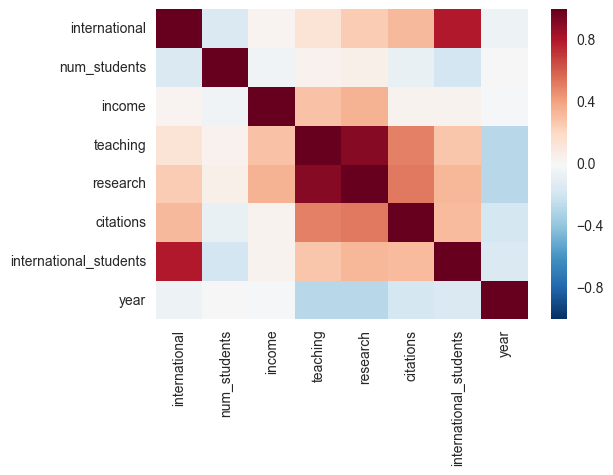

In [9]:
cols = ['international','num_students','income', 'teaching', 'research', 'citations', \
        'international_students', 'total_score', 'year']
df2 = dfc.copy()[cols]
dfc_X = df2[(df2['total_score'] != '-') & (df2['total_score'].notnull())]
dfc_X.info()


dfc_u_2016 = dfc.copy()
dfc_u_2016 = dfc_u_2016['university_name'][(dfc_u_2016['year'] == 2016)]
dfc_train = dfc_X['total_score'].astype(float)
dfc_X.drop('total_score', axis=1, inplace=True)


dfc_X_2016 = df2[(df2['year'] == 2016)]
dfc_X_2016 =dfc_X_2016.drop('total_score', axis =1)
dfc_X_2016.info()
print dfc_X_2016['year'].unique()
#print dfc_X.dtypes
# train_cols = ['total_score']
# train = dfc_train.copy()[train_cols]

 
#print df2
sns.heatmap(df2.corr())

In [10]:
X = dfc_X
y =  dfc_train

lr = linear_model.LinearRegression()
lr_model = lr.fit(X,y)

y_pred = lr_model.predict(dfc_X_2016)
y_pred_df =  pd.DataFrame(y_pred)
pred = pd.Series(y_pred)

In [11]:
new = pd.concat([dfc_u_2016, dfc_X_2016],axis=1)
new.reset_index(drop=True, inplace=True)

In [12]:
pred_df = pred.to_frame('pred_score')
result_df = pd.concat([new,pred_df], axis = 1)
#result_df

"""dfLeft.reset_index(inplace=True)
dfRight.reset_index(inplace=True)
dfMerged = pd.merge(dfLeft, dfRight,
              left_on=['date', 'cusip'],
              right_on=['date', 'idc__id'],
              how='inner')
"""
dfLeft = dfs
dfRight = result_df
dfMerged = pd.merge(dfLeft, dfRight,
              left_on=['university_name'],
              right_on=['university_name'],
              how='inner')
dfMerged.info() 
dfs.info()
dfMerged.to_csv("/users/kristensu/Desktop/university_preds_SKJP.csv")

<class 'pandas.core.frame.DataFrame'>
Int64Index: 800 entries, 0 to 799
Data columns (total 12 columns):
world_rank                800 non-null object
university_name           800 non-null object
total_score               0 non-null float64
international             800 non-null float64
num_students              800 non-null float64
income                    800 non-null float64
teaching                  800 non-null float64
research                  800 non-null float64
citations                 800 non-null float64
international_students    800 non-null float64
year                      800 non-null int64
pred_score                800 non-null float64
dtypes: float64(9), int64(1), object(2)
memory usage: 81.2+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 3 columns):
world_rank         800 non-null object
university_name    800 non-null object
total_score        0 non-null float64
dtypes: float64(1), object(2)
memory usage: 18.8+ KB


IOError: [Errno 2] No such file or directory: '/users/kristensu/Desktop/university_preds_SKJP.csv'

In [13]:
type(pred)

pandas.core.series.Series

In [14]:
y.dtype

dtype('float64')

In [15]:
dfc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2603 entries, 0 to 2602
Data columns (total 14 columns):
world_rank                2603 non-null int64
university_name           2603 non-null object
country                   2603 non-null object
teaching                  2603 non-null float64
international             2603 non-null float64
research                  2603 non-null float64
citations                 2603 non-null float64
income                    2603 non-null float64
total_score               1803 non-null object
num_students              2603 non-null float64
student_staff_ratio       2603 non-null float64
international_students    2603 non-null float64
female_male_ratio         2370 non-null object
year                      2603 non-null int64
dtypes: float64(8), int64(2), object(4)
memory usage: 284.8+ KB


In [16]:
sns.regplot(x=y, y=y_pred)

ValueError: all the input array dimensions except for the concatenation axis must match exactly

In [17]:
dfs.head()

,world_rank,university_name,total_score
0,1,California Institute of Technology,NaN
1,2,University of Oxford,NaN
2,3,Stanford University,NaN
3,4,University of Cambridge,NaN
4,5,Massachusetts Institute of Technology,NaN


In [18]:
dfc.head()

,world_rank,university_name,country,teaching,international,research,citations,income,total_score,num_students,student_staff_ratio,international_students,female_male_ratio,year
0,1,Harvard University,United States of America,99.7,72.4,98.7,98.8,34.5,96.1,20152.0,8.9,25.0,NaN,2011
1,2,California Institute of Technology,United States of America,97.7,54.6,98.0,99.9,83.7,96,2243.0,6.9,27.0,33 : 67,2011
2,3,Massachusetts Institute of Technology,United States of America,97.8,82.3,91.4,99.9,87.5,95.6,11074.0,9.0,33.0,37 : 63,2011
3,4,Stanford University,United States of America,98.3,29.5,98.1,99.2,64.3,94.3,15596.0,7.8,22.0,42:58:00,2011
4,5,Princeton University,United States of America,90.9,70.3,95.4,99.9,41.0,94.2,7929.0,8.4,27.0,45:55:00,2011
